In [1]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import os
import sys

sys.path.append('.')
sys.path.append('../')
sys.path.append('../../')
import numpy as np
import networkx as nx
from src.utils.distances import (
    distance_frobenius,
    distance_procrustes_LE,
    DeltaConDistance,
    WL_distance
)

import matplotlib.pyplot as plt
import seaborn as sns



In [3]:

n_nodes = 100  # number of nodes
n_graphs = 10  # number of graphs to generate for each probability
p_values = np.linspace(0.1, 0.9, 9)  # different probability values
n_experiments = 10  # number of times to repeat each comparison

# Initialize results dictionary
results = {
    'Frobenius': [],
    'Procrustes': [],
    'DeltaCon': [],
    'WL': [],
    'p_values': [],
}

# Run experiments
for p1 in p_values:
    print(f'p = {p1}')
    for j in range(n_experiments):
        print(f'Experiment {j}')
        # Generate two random graphs with same probability
        G1 = nx.erdos_renyi_graph(n_nodes, p1)
        G2 = nx.erdos_renyi_graph(n_nodes, p1)
        
        # Convert to adjacency matrices
        A1 = nx.to_numpy_array(G1)
        A2 = nx.to_numpy_array(G2)
        
        # Calculate distances
        frob_dist = distance_frobenius(A1, A2)
        proc_dist = distance_procrustes_LE(A1, A2, k=10)
        delta_dist = DeltaConDistance(A1, A2)
        wl_dist = WL_distance(A1, A2, n_iter=5)
        
        # Store results
        results['Frobenius'].append(frob_dist)
        results['Procrustes'].append(proc_dist)
        results['DeltaCon'].append(delta_dist)
        results['WL'].append(wl_dist)
        results['p_values'].append(p1)


p = 0.1
Experiment 0


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.2
Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.30000000000000004
Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.4
Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.5
Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.6
Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.7000000000000001
Experiment 0
Experiment 1
Experiment 2
Experiment 3
Experiment 4
Experiment 5
Experiment 6
Experiment 7
Experiment 8
Experiment 9
p = 0.8
Experiment 0
Exp

In [5]:
import pickle
with open(f'results_n_{n_nodes}.pkl', 'wb') as f:
    pickle.dump(results, f)


In [10]:
import pandas as pd
df = pd.DataFrame(results)


,Frobenius,Procrustes,DeltaCon,WL,p_values
0,1.770813,3.552362,7.899405,0.511933,0.1
1,1.841649,3.667525,7.570248,0.509947,0.1
2,1.725620,3.661157,7.687857,0.510289,0.1
3,1.821769,3.636769,7.799401,0.511232,0.1
4,1.864992,3.745908,8.040053,0.510625,0.1
...,...,...,...,...,...
85,0.193899,3.696195,4.346640,0.512292,0.9
86,0.192696,3.665014,1.256887,0.511697,0.9
87,0.199241,3.702746,4.549733,0.510196,0.9
88,0.205550,3.694712,3.977632,0.511341,0.9


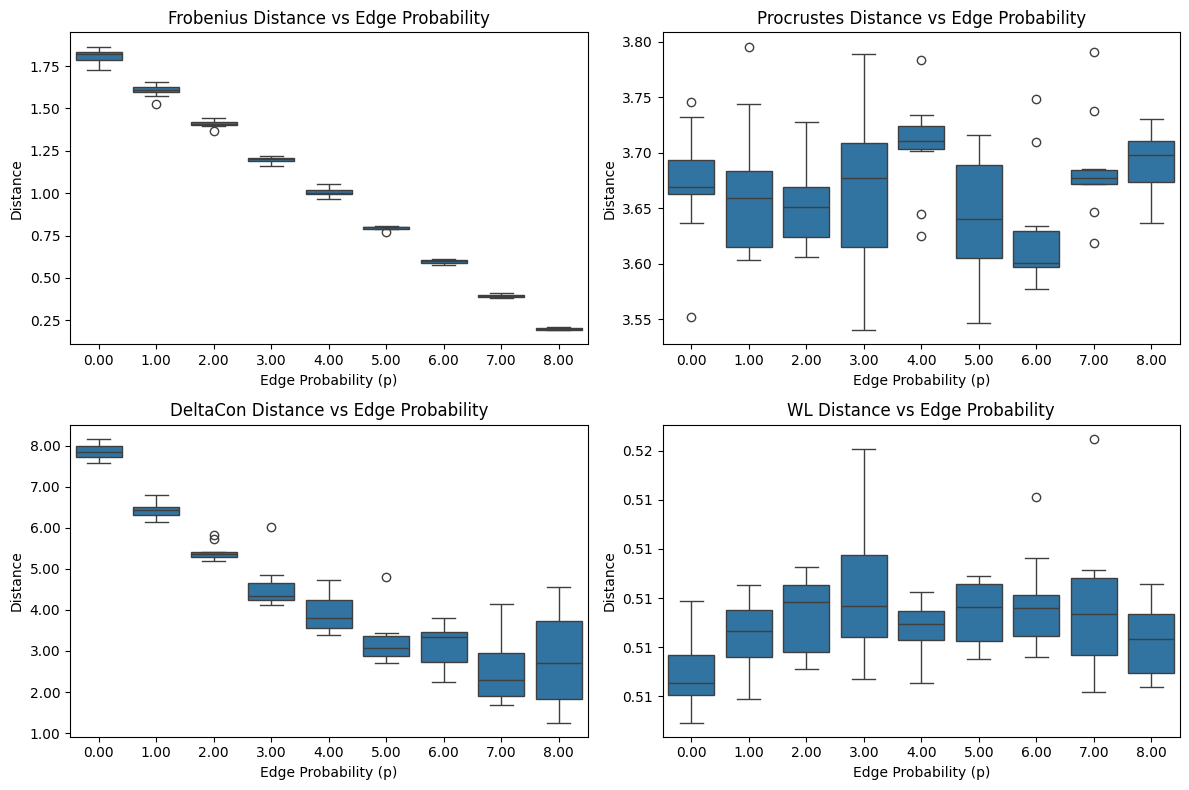

In [12]:
# Plot results
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.ravel()

for i, metric in enumerate(['Frobenius', 'Procrustes', 'DeltaCon', 'WL']):
    sns.boxplot(x='p_values', y=metric, data={
        'p_values': results['p_values'],
        metric: results[metric]
    }, ax=axes[i])
    axes[i].set_title(f'{metric} Distance vs Edge Probability')
    axes[i].set_xlabel('Edge Probability (p)')
    axes[i].set_ylabel('Distance')
    axes[i].xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
    axes[i].yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

plt.tight_layout()
plt.show()


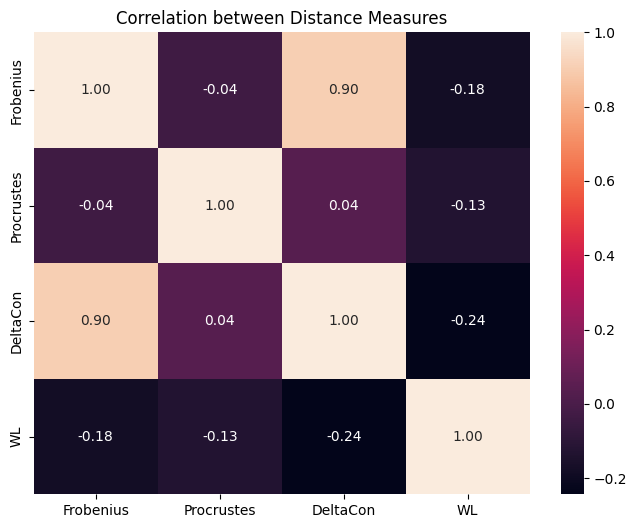

In [13]:
# Calculate correlations between distances
distance_matrix = np.array([
    results['Frobenius'],
    results['Procrustes'],
    results['DeltaCon'],
    results['WL']
]).T

correlation_matrix = np.corrcoef(distance_matrix.T)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt='.2f',
            xticklabels=['Frobenius', 'Procrustes', 'DeltaCon', 'WL'],
            yticklabels=['Frobenius', 'Procrustes', 'DeltaCon', 'WL'])
plt.title('Correlation between Distance Measures')
plt.show()

# Same Family

In [14]:
n_nodes = 100
n_experiments = 20

def calculate_distances(G1, G2):
    """Calculate all distances between two graphs"""
    A1 = nx.to_numpy_array(G1)
    A2 = nx.to_numpy_array(G2)
    
    return {
        'Frobenius': distance_frobenius(A1, A2),
        'Procrustes': distance_procrustes_LE(A1, A2, k=10),
        'DeltaCon': DeltaConDistance(A1, A2),
        'WL': WL_distance(A1, A2, n_iter=5)
    }

# Initialize results
results = {
    'Distance': [],
    'Value': [],
    'Comparison': [],
    'Model': []
}

# Define graph models and their parameters
graph_models = {
    'Erdos-Renyi': {
        'similar': [(0.3, 0.31)],  # (p1, p2) pairs
        'dissimilar': [(0.2, 0.8)],
        'generator': lambda p: nx.erdos_renyi_graph(n_nodes, p)
    },
    'Watts-Strogatz': {
        'similar': [(0.1, 0.12)],  # (beta1, beta2) pairs with k=4
        'dissimilar': [(0.1, 0.9)],
        'generator': lambda beta: nx.watts_strogatz_graph(n_nodes, 4, beta)
    },
    'Barabasi-Albert': {
        'similar': [(3, 4)],  # (m1, m2) pairs
        'dissimilar': [(2, 10)],
        'generator': lambda m: nx.barabasi_albert_graph(n_nodes, m)
    },
    'Stochastic-Block': {
        'similar': [(0.3, 0.1, 0.31, 0.11)],  # (p_in1, p_out1, p_in2, p_out2)
        'dissimilar': [(0.3, 0.1, 0.8, 0.6)],
        'generator': lambda p_in, p_out: nx.stochastic_block_model(
            sizes=[n_nodes//2, n_nodes//2],
            p=[[p_in, p_out], [p_out, p_in]]
        )
    }
}

In [15]:
# Run experiments
for model_name, model_info in graph_models.items():
    print(f"Processing {model_name}...")
    
    # Similar graphs
    for params in model_info['similar']:
        for _ in range(n_experiments):
            if model_name == 'Stochastic-Block':
                G1 = model_info['generator'](params[0], params[1])
                G2 = model_info['generator'](params[2], params[3])
            else:
                G1 = model_info['generator'](params[0])
                G2 = model_info['generator'](params[1])
            
            distances = calculate_distances(G1, G2)
            for dist_name, value in distances.items():
                results['Distance'].append(dist_name)
                results['Value'].append(value)
                results['Comparison'].append('Similar')
                results['Model'].append(model_name)
    
    # Dissimilar graphs
    for params in model_info['dissimilar']:
        for _ in range(n_experiments):
            if model_name == 'Stochastic-Block':
                G1 = model_info['generator'](params[0], params[1])
                G2 = model_info['generator'](params[2], params[3])
            else:
                G1 = model_info['generator'](params[0])
                G2 = model_info['generator'](params[1])
            
            distances = calculate_distances(G1, G2)
            for dist_name, value in distances.items():
                results['Distance'].append(dist_name)
                results['Value'].append(value)
                results['Comparison'].append('Dissimilar')
                results['Model'].append(model_name)

# Convert to DataFrame
df = pd.DataFrame(results)
with open(f'results_same_family.pkl', 'wb') as f:
    pickle.dump(df, f)


Processing Erdos-Renyi...


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


Processing Watts-Strogatz...
Processing Barabasi-Albert...
Processing Stochastic-Block...


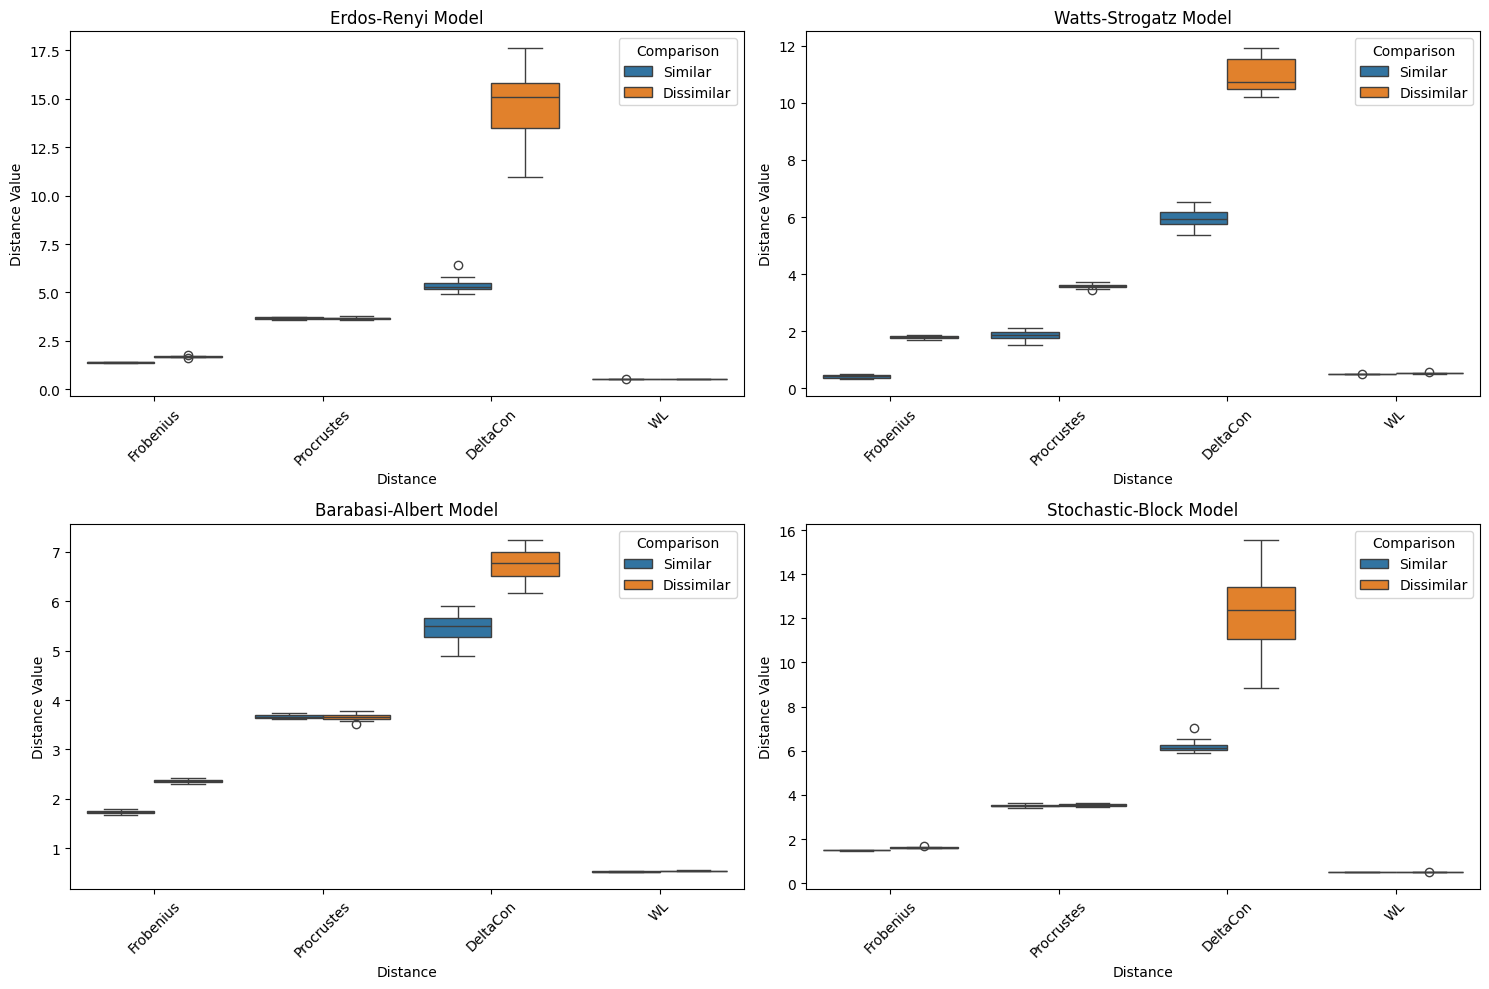


Average distances for each model and comparison:
Comparison                   Dissimilar   Similar
Model            Distance                        
Barabasi-Albert  DeltaCon      6.737626  5.472789
                 Frobenius     2.363095  1.731177
                 Procrustes    3.660105  3.671706
                 WL            0.549523  0.528974
Erdos-Renyi      DeltaCon     14.629578  5.356395
                 Frobenius     1.695394  1.384704
                 Procrustes    3.660471  3.666379
                 WL            0.528314  0.511609
Stochastic-Block DeltaCon     12.270383  6.214570
                 Frobenius     1.612614  1.494474
                 Procrustes    3.536145  3.515150
                 WL            0.527580  0.511881
Watts-Strogatz   DeltaCon     10.911609  5.967806
                 Frobenius     1.791000  0.420000
                 Procrustes    3.590423  1.840917
                 WL            0.532606  0.508296


In [17]:
# Create plots
plt.figure(figsize=(15, 10))
for i, model in enumerate(graph_models.keys(), 1):
    plt.subplot(2, 2, i)
    model_data = df[df['Model'] == model]
    
    sns.boxplot(data=model_data, x='Distance', y='Value', hue='Comparison')
    plt.title(f'{model} Model')
    plt.xticks(rotation=45)
    plt.ylabel('Distance Value')
    
plt.tight_layout()
plt.show()

# Calculate and display average distances
print("\nAverage distances for each model and comparison:")
avg_distances = df.groupby(['Model', 'Distance', 'Comparison'])['Value'].mean().unstack()
print(avg_distances)

# Different Family

In [18]:
n_nodes = 100
n_experiments = 20

def calculate_distances(G1, G2):
    """Calculate all distances between two graphs"""
    A1 = nx.to_numpy_array(G1)
    A2 = nx.to_numpy_array(G2)
    
    return {
        'Frobenius': distance_frobenius(A1, A2),
        'Procrustes': distance_procrustes_LE(A1, A2, k=10),
        'DeltaCon': DeltaConDistance(A1, A2),
        'WL': WL_distance(A1, A2, n_iter=5)
    }

# Initialize results
results = {
    'Distance': [],
    'Value': [],
    'Comparison': [],
    'Model_Pair': []
}

# Define graph generators with their default parameters
graph_generators = {
    'ER': lambda: nx.erdos_renyi_graph(n_nodes, p=0.3),
    'WS': lambda: nx.watts_strogatz_graph(n_nodes, k=4, p=0.1),
    'BA': lambda: nx.barabasi_albert_graph(n_nodes, m=3),
    'SBM': lambda: nx.stochastic_block_model(
        sizes=[n_nodes//2, n_nodes//2],
        p=[[0.3, 0.1], [0.1, 0.3]]
    )
}

# Define similar and dissimilar model pairs
similar_pairs = [
    ('ER', 'SBM'),    # Both have random-like structure
    ('WS', 'ER'),     # Both can have similar clustering when p is small
    ('BA', 'SBM'),    # Both can have hub-like structures
]

dissimilar_pairs = [
    ('BA', 'WS'),     # Scale-free vs regular structure
    ('ER', 'BA'),     # Random vs scale-free
    ('WS', 'SBM'),    # Regular vs community structure
]


In [19]:
# Run experiments
print("Processing similar pairs...")
for model1_name, model2_name in similar_pairs:
    for _ in range(n_experiments):
        G1 = graph_generators[model1_name]()
        G2 = graph_generators[model2_name]()
        
        distances = calculate_distances(G1, G2)
        for dist_name, value in distances.items():
            results['Distance'].append(dist_name)
            results['Value'].append(value)
            results['Comparison'].append('Similar')
            results['Model_Pair'].append(f'{model1_name}-{model2_name}')

print("Processing dissimilar pairs...")
for model1_name, model2_name in dissimilar_pairs:
    for _ in range(n_experiments):
        G1 = graph_generators[model1_name]()
        G2 = graph_generators[model2_name]()
        
        distances = calculate_distances(G1, G2)
        for dist_name, value in distances.items():
            results['Distance'].append(dist_name)
            results['Value'].append(value)
            results['Comparison'].append('Dissimilar')
            results['Model_Pair'].append(f'{model1_name}-{model2_name}')

# Convert to DataFrame
df = pd.DataFrame(results)

with open(f'results_diff_family.pkl', 'wb') as f:
    pickle.dump(df, f)


Processing similar pairs...


<class 'networkx.utils.decorators.argmap'> compilation 12:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [ ]:
# Create plots
plt.figure(figsize=(15, 10))

# Plot for each distance measure
for i, distance in enumerate(['Frobenius', 'Procrustes', 'DeltaCon', 'WL'], 1):
    plt.subplot(2, 2, i)
    distance_data = df[df['Distance'] == distance]
    
    sns.boxplot(data=distance_data, x='Model_Pair', y='Value', hue='Comparison')
    plt.title(f'{distance} Distance')
    plt.xticks(rotation=45)
    plt.ylabel('Distance Value')
    
plt.tight_layout()
plt.show()

# Calculate and display average distances
print("\nAverage distances for each model pair and comparison:")
avg_distances = df.groupby(['Model_Pair', 'Distance', 'Comparison'])['Value'].mean().unstack()
print(avg_distances)

# Create a heatmap of average distances for each measure
plt.figure(figsize=(15, 10))
for i, distance in enumerate(['Frobenius', 'Procrustes', 'DeltaCon', 'WL'], 1):
    plt.subplot(2, 2, i)
    
    # Prepare data for heatmap
    pivot_data = df[df['Distance'] == distance].pivot_table(
        values='Value',
        index='Model_Pair',
        columns='Comparison',
        aggfunc='mean'
    )
    
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd')
    plt.title(f'{distance} Distance')
    
plt.tight_layout()
plt.show()